<a href="https://colab.research.google.com/github/ahaque12/baseball-with-dice/blob/master/Baseball_with_dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riddler Express - Baseball with dice

https://fivethirtyeight.com/features/can-you-turn-americas-pastime-into-a-game-of-yahtzee/

Over the years, people have invented many games that simulate baseball using two standard dice. In these games, each dice roll corresponds with a baseball event. Two players take turns rolling dice and tracking what happens on the field. Suppose you happen to be an ardent devotee of one of these simulated games from the late 19th century, called Our National Ball Game, which assigns rolls to baseball outcomes like so:

1, 1: double

1, 2: single

1, 3: single

1, 4: single

1, 5: base on error

1, 6: base on balls

2, 2: strike

2, 3: strike

2, 4: strike

2, 5: strike

2, 6: foul out

3, 3: out at 1st

3, 4: out at 1st

3, 5: out at 1st

3, 6: out at 1st

4, 4: fly out

4, 5: fly out

4, 6: fly out

5, 5: double play

5, 6: triple

6, 6: home run

Given those rules, what’s the average number of runs that would be scored in nine innings of this dice game? What’s the distribution of the number of runs scored? (Histograms welcome.) You can assume some standard baseball things, like runners scoring from second on singles and runners scoring from third on fly outs.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
outcomes = ['double', 'single', 'single', 'single', 'base on error', 'base on balls', 'strike', 'strike', 'strike', 'strike', 'foul out', 'out at 1st', 'out at 1st', 'out at 1st', 'out at 1st', 'fly out', 'fly out', 'fly out', 'double play', 'triple', 'home run']
outcome_index = np.cumsum(range(6, 0, -1))
print(outcome_index)

def int_to_outcome(x):
  if x > 35:
    raise ValueError('Number is too large!')
  if x < 0:
    raise ValueError('Number cannot be less than zero!')
    
  a, b = x // 6, x % 6
  a += 1
  b += 1
  if b < a:
    return roll(b, a)
  else:
    return roll(b, a)
    
def roll(a, b):
  if a == 1:
    return outcomes[b - 1]
  else:
    return outcomes[outcome_index[a-2] + (b-a)]

assert(roll(2, 6)) == 'foul out'
assert int_to_outcome(0) == 'double'
assert int_to_outcome(6) == 'single'
assert int_to_outcome(7) == 'strike'
assert int_to_outcome(35) == 'home run'

[ 6 11 15 18 20 21]


In [3]:
for i in range(1, 7):
  for j in range(i, 7):
    print(i, j, roll(i, j))

1 1 double
1 2 single
1 3 single
1 4 single
1 5 base on error
1 6 base on balls
2 2 strike
2 3 strike
2 4 strike
2 5 strike
2 6 foul out
3 3 out at 1st
3 4 out at 1st
3 5 out at 1st
3 6 out at 1st
4 4 fly out
4 5 fly out
4 6 fly out
5 5 double play
5 6 triple
6 6 home run


In [0]:
class Play():

  def __init__(self):
      self.bases = np.array([0, 0, 0])
      self.outs = 0
      self.strikes = 0
      self.runs = 0
  
  def move_players(self, moves=1):
    self.bases[2] = 0
    if moves == 1:
      self.bases[2] = self.bases[1]
      self.bases[1] = self.bases[0]
      self.bases[0] = 1
    elif moves == 2:
      self.bases[2] = self.bases[0]
      self.bases[0] = 0
      self.bases[1] = 1
    elif moves == 3:
      self.bases.fill(0)
      self.bases[2] = 1
      
  def is_done(self):
    return self.outs >= 3
      
  def walk(self):
    if self.bases[0] == 1:
      if self.bases[1] == 1:
        if self.bases[2] == 0:
          self.bases[2] = 1
      else:
        self.bases[1] = 0
    
  def move(self, move):
    if move == 'single':
      self.runs += self.bases[2]
      self.move_players(1)
    elif move == 'double':
      self.runs += self.bases[1:].sum()
      self.move_players(2)
    elif move == 'triple':
      self.runs += self.bases.sum()
      self.move_players(3)
    elif (move == 'base on error') or (move == 'base on balls'):
      if self.bases.sum() == 3:
        self.runs += 1
      self.walk()
    elif move == 'home run':
      self.runs += self.bases.sum() + 1
    elif move == 'strike':
      self.strikes += 1
      if self.strikes >= 3:
        self.outs += 1
        self.strikes = 0
    elif (move == 'foul out') or (move == 'fly out') or (move == 'out at 1st'):
      self.outs += 1
      

In [0]:
def simulate_half_inning():
  play = Play()
  while not play.is_done():
    r = np.random.randint(0, 36)
    move = int_to_outcome(r)
    play.move(move)
  return play.runs

In [6]:
from tqdm import tqdm
N = 1000000

half_innings = []
for i in tqdm(range(N)):
  half_innings.append(simulate_half_inning())
  
half_innings = np.array(half_innings)

100%|██████████| 1000000/1000000 [00:30<00:00, 32969.50it/s]


In [7]:
print("Mean runs in a half inning is", half_innings.mean())
print("Standard deviation of runs in a half inning is", half_innings.std())

Mean runs in a half inning is 0.496422
Standard deviation of runs in a half inning is 1.0277135777618198


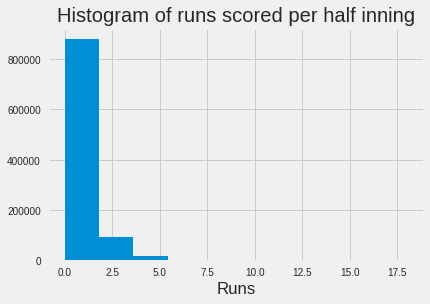

In [8]:
plt.hist(half_innings)
plt.xlabel("Runs")
plt.title("Histogram of runs scored per half inning");

In [9]:
pd.Series(half_innings).describe()

count    1000000.000000
mean           0.496422
std            1.027714
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           18.000000
dtype: float64

Log likelihood of norm 1477.084606732824
Log likelihood of expon 253.45204271293937
Log likelihood of pareto -7029.573571929426


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Log likelihood of exponweib -25230.068097422947
Log likelihood of weibull_min -29831.342980587295


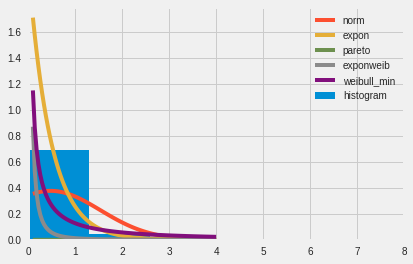

In [10]:
import scipy
import scipy.stats
size = 1000

fig, ax = plt.subplots()
ax.hist(half_innings[:size], density=True, label='histogram')
x = np.linspace(.1, 4, 100)

dist_names = ['norm', 'expon', 'pareto', 'exponweib', 'weibull_min']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(half_innings[:size])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    ax.plot(x, pdf_fitted, label=dist_name)
    ax.set_xlim(0, 8)
    print("Log likelihood of", dist_name, dist.nnlf(param, half_innings[:size]))
plt.legend(loc='upper right')

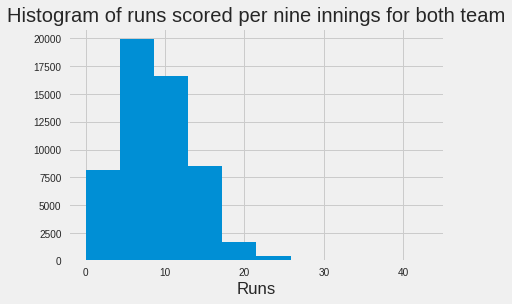

In [11]:
nine_innings = half_innings[:(N - (N % 18))].reshape((18, -1)).sum(axis=0)

plt.hist(nine_innings)
plt.xlabel("Runs")
plt.title("Histogram of runs scored per nine innings for both team");

In [12]:
pd.Series(nine_innings).describe()

count    55555.000000
mean         8.935577
std          4.368894
min          0.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         43.000000
dtype: float64

In [13]:
print("The average number of runs in 9 innings between both teams is {}".format(18*half_innings.mean()))

The average number of runs in 9 innings between both teams is 8.935596
